## $Inteligencia$ $Artificial$ - $Taller$ $Agentes$
## $Nicolas$ $Garzón$ $Carvajal$
## $Juan$ $Felipe$ $Balaguera$
## $Alex$ $Duran$

##$Punto$ $1)$

Considere el problema del robot aspiradora y la función del agente presentada en la figura 2.2 del libro de Russell & Norvig (página 36). A partir de esto:

  A. Muestre que, bajo las suposiciones presentadas en clase, la aspiradora tiene un comportamiento racional.

  B. Para este mismo escenario diseñe una función para un agente racional cuya medida de desempeño disminuye una unidad por cada movimiento. ¿En este caso se requiere un estado interno?

**Solución**

$A)$ A partir del problema del robot aspiradora y la función del agente (Figura libro Russel). Un agente racional es aquel que toma decisiones que maximizan la utilidad, en este caso su medida de desempeño en función de sus percepciones y conocimientos previos, en este caso:


*   Percepciones del agente: La ubicación actual y el estado de limpieza del cuadro
*   Acciones disponibles:Moverse a la izquierda, moverse a la derecha, aspirar, no hacer nada.
*   Medida de desempeño: Se evalúa en función de la cantidad de suciedad eliminada.

La función del agente mostrada en la tabla de la Figura 2.3 sigue las siguientes reglas:
* Si la casilla actual está sucia → Aspirar (acción que directamente mejora el desempeño).
* Si la casilla está limpia → Moverse a la otra casilla.

Este comportamiento es recional bajo la medida de desempeño, ya que maximiza la limpieza en el entorno



$B)$ Nueva Estrategia del Agente Para optimizar el desempeño con penalización por movimiento:
* Si la casilla actual está sucia → Aspirar. (Esta acción sigue siendo prioritaria, ya que maximiza la limpieza sin penalización de movimiento).
* Si la casilla está limpia y el otro cuadrado estaba sucio en una percepción anterior → Moverse hacia él. (Solo nos movemos si hay certeza de que el otro cuadrado está sucio, para evitar movimientos innecesarios).
* Si la casilla está limpia y no hay información sobre la otra → No hacer nada. (En este caso, el agente evita moverse innecesariamente, lo que reduce penalización).

En este caso necesitamos de un estado interno, debido a que el agente debe recordar si anteriormente percibió que el otro cuadrado estaba sucio o no, sin el estado interno no puede tomar decisiones informadas sobre el siguiente cuadro al que se va a mover.

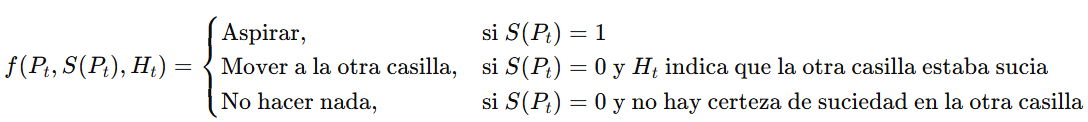

* L y 𝑅 los dos cuadrados (izquierda y derecha, respectivamente).
* 𝑆 ( 𝑥 )el estado de suciedad del cuadrado 𝑥 x, donde 𝑆 ( 𝑥 ) = 1  si está sucio y 𝑆 ( 𝑥 ) = 0 si está limpio.
* 𝑃 (𝑡)​ la posición actual del agente en el tiempo 𝑡, donde 𝑃_𝑡 ∈ { 𝐿 , 𝑅 }.
* 𝐻_𝑡 el historial de percepciones hasta el tiempo 𝑡, que almacena estados previos de suciedad(Estado interno).

##$Punto$ $2)$

Suponga que el comportamiento de un agente es evaluado a través de una métrica de desempeño que solo considera las primeras 𝑇 unidades de tiempo e ignora todo los demás después de eso. Muestre que la racionalidad del agente no depende únicamente del estado del ambiente sino del tiempo disponible.
Presente 2 ejemplos para esta situación.

**Ejemplo 1:** Robot aspiradora con tiempo limitado
Supongamos que la aspiradora tiene dos celdas (A y B), y su objetivo es limpiar la mayor cantidad de suciedad posible en 𝑇=2 unidades de tiempo.

1. Caso sin límite de tiempo:

Si empieza en A y está sucia, limpia (Suck).
Luego se mueve a B y limpia si está sucia.
Aunque hace un movimiento extra, maximiza la limpieza total.
2. Caso con T=2:

Si empieza en A y está sucia, lo mejor es limpiar inmediatamente.
Moverse a B consumiría la segunda unidad de tiempo, dejando a la aspiradora sin la oportunidad de limpiar si B está sucia.
En este caso, un agente racional podría decidir limpiar solo la celda en la que se encuentra si no tiene certeza de que la otra celda está sucia.

Conclusión: Con un tiempo limitado, moverse podría ser una mala decisión si no hay certeza de que B está sucia. Sin un límite de tiempo, el agente puede explorar más

**Ejemplo 2:** Entrega de paquetes con un dron
Un dron debe entregar paquetes a dos ubicaciones en una ciudad. Tiene un tiempo límite de 𝑇=5 minutos para entregar la mayor cantidad posible.

Caso sin límite de tiempo:

El dron podría elegir la ruta más eficiente a largo plazo, evitando obstáculos y asegurando la entrega de todos los paquetes.
Caso con 𝑇=5:

Si un paquete está más lejos y no puede ser entregado en 5 minutos, es racional ignorarlo y enfocarse en entregar los paquetes más cercanos.
Un dron que intentara seguir la ruta óptima a largo plazo podría no completar ninguna entrega dentro del límite de tiempo.

Conclusión: La racionalidad depende del horizonte de tiempo. Con tiempo infinito, el dron intenta entregar todos los paquetes; con tiempo finito, solo entrega los posibles dentro del límite.

## $Punto$ $3)$

Utilizando como guía el notebook Robot_Aspiradora_IA disponible en el aula; construya una simulación para el problema del robot aspiradora. Implemente un agente reflexivo que limpie todas las hojas en el tablero considerando las siguientes especificaciones:

·       El tamaño del ambiente y la ubicación de las hojas debe ser configurable.

·       El agente debe tener los métodos avanzar, girar (90°, 180° y 270°) y el atributo de energía disponible.

·       El agente debe recibir la posición y la energía inicial.

·       Por cada movimiento (incluido aspirar) se consumirá una unidad de energía

·       Si el agente no tiene energía, no podrá moverse

·       El agente puede percibir las hojas en la casilla actual o en las casillas vecinas. No se incluyen las diagonales

·       Cada vez que el agente utiliza el sensor que le permite determinar si hay hojas en las casillas vecinas, se consumirá una unidad de energía. Detectar hojas en la casilla actual no consume energía.

·       Al agente solo puede aspirar en la casilla actual

·       La ubicación de las hojas se define de manera aleatoria al inicio de la simulación donde cada celda tiene una probabilidad del 50% de contener hojas.

·       Ejecute la simulación al menos 50 veces y calcule el promedio de la energía consumida y las hojas recogidas en cada ejecución.

In [30]:
from IPython.display import display
import ipywidgets as widgets
import time
import random

class Tablero:
  def __init__(self, tamano_celda=(50, 50)):
    self.n=int(input("Ingrese el numero de filas: "))
    self.m=int(input("Ingrese el numero de columnas: "))
    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = (self.n, self.m)


  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""
      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1],
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

In [31]:
import random
import math


class Agente:
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, tamano_tablero=(5, 5)):
        self.x = x
        self.y = y
        self.angulo = angulo
        self.emoticon = emoticon
        self.tamano_emoticon = tamano_emoticon
        self.energia = 1000
        self.visitados = set()
        self.basura_encontrada = set()
        self.tamano_tablero = tamano_tablero  # Tamaño del tablero (filas, columnas)
        self.casillas_no_visitadas = tamano_tablero[0] * tamano_tablero[1]  # Total de casillas en el tablero

    def registrar_vecinos(self, basuras):
        # Revisar las posiciones vecinas para ver si hay basura
        vecinos = [(self.x + 1, self.y), (self.x - 1, self.y), (self.x, self.y + 1), (self.x, self.y - 1)]
        for vx, vy in vecinos:
            if (vx, vy) in [(b.x, b.y) for b in basuras]:
                self.basura_encontrada.add((vx, vy))  # Registrar posiciones con basura

    def avanzar(self, limite_x, limite_y, basuras):
        if self.energia <= 0:
            print("El agente se ha quedado sin energía.")
            return

        self.visitados.add((self.x, self.y))  # Registrar la posición actual
        self.registrar_vecinos(basuras)  # Revisar si hay basuras cercanas

        # Limpiar si hay basura en la posición actual
        self.limpiar(basuras)

        # Actualizar el contador de casillas no visitadas
        self.casillas_no_visitadas = self.tamano_tablero[0] * self.tamano_tablero[1] - len(self.visitados)

        # Si hay basura registrada, moverse hacia ella
        if self.basura_encontrada:
            destino = self.basura_encontrada.pop()  # Sacar una posición de basura detectada
            self.x, self.y = destino
            self.energia -= 1  # Consumir energía al moverse
            self.limpiar(basuras)  # Limpiar al llegar a la nueva posición
            return

        # Encontrar la casilla no visitada más cercana
        casillas_no_visitadas = [(x, y) for x in range(limite_x) for y in range(limite_y) if (x, y) not in self.visitados]

        if casillas_no_visitadas:
            # Calcular la casilla más cercana
            destino = min(casillas_no_visitadas, key=lambda pos: self.distancia((self.x, self.y), pos))
            self.x, self.y = destino
            self.energia -= 1  # Consumir energía al moverse
            self.limpiar(basuras)  # Limpiar al llegar a la nueva posición
        else:
            # Si no hay movimientos posibles, girar aleatoriamente
            self.girar(random.choice([90, 180, 270]))

    def distancia(self, pos1, pos2):
        # Calcular la distancia euclidiana entre dos posiciones
        return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

    def girar(self, grados):
        if grados in [90, 180, 270]:
            self.angulo = (self.angulo + grados) % 360

    def limpiar(self, basuras):
        for basura in basuras[:]:  # Iterar sobre una copia de la lista
            if self.x == basura.x and self.y == basura.y:
                basuras.remove(basura)  # Eliminar la basura encontrada
                self.visitados.add((self.x, self.y))  # Registrar la posición como limpia
                self.energia -= 1  # Consumir energía al limpiar


In [32]:
# Crear el tablero
escenario = Tablero()

# Crear el agente
agente = Agente()


# Generar basuras en posiciones aleatorias
basuras = []
for i in range(escenario.n):
    for j in range(escenario.m):
        if (i, j) != (0, 0) and random.random() < 0.5:  # Probabilidad del 50%
            basuras.append(Agente(j, i, 0, emoticon="🍂", tamano_emoticon=30))

# Lista de objetos en el tablero
objetos = [agente] + basuras

# Animación del agente moviéndose hacia abajo
for _ in range(agente.energia):
    escenario.dibujar(objetos)
    time.sleep(0.05)

    agente.limpiar(basuras)  # Primero limpiar la basura en la posición actual
    objetos = [agente] + basuras  # Actualizar la lista de objetos después de limpiar

    if not basuras:  # Si ya no hay basura, terminar el ciclo
        break

    agente.avanzar(escenario.m, escenario.n, basuras)
    objetos = [agente] + basuras  # Volver a actualizar después de moverse
    energia_gastada = 1000 - agente.energia  # Restar energía restante de la inicial
print(f"El agente se detuvo tras gastar {energia_gastada} unidades de energía.")

Ingrese el numero de filas: 5
Ingrese el numero de columnas: 5


HTML(value='')

El agente se detuvo tras gastar 32 unidades de energía.


## $Punto$ $4)$

Implemente un agente con estado para solucionar el problema. Ejecute la simulación al menos 50 veces y calcule el promedio de la energía consumida y las hojas recogidas en cada ejecución

In [35]:
from IPython.display import display
import ipywidgets as widgets
import time
import random
import math

# Solicitar el tamaño del tablero UNA VEZ
filas = int(input("Ingrese el número de filas: "))
columnas = int(input("Ingrese el número de columnas: "))

class Tablero:
    def __init__(self, filas, columnas, tamano_celda=(50, 50)):
        self.n = filas
        self.m = columnas
        self.out = widgets.HTML()
        display(self.out)
        self.tamano_celda = tamano_celda
        self.n_celdas = (self.n, self.m)

    def dibujar(self, objetos):
        tablero = "<table border='1'>{}</table>"
        filas_html = ""

        for i in range(self.n_celdas[0]):
            s = ""
            for j in range(self.n_celdas[1]):
                contenido = ""
                for o in objetos:
                    if o.x == j and o.y == i:
                        contenido = "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".format(
                            angulo=o.angulo, tamano_emoticon=o.tamano_emoticon, emoticon=o.emoticon)
                s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".format(
                    alto=self.tamano_celda[0], ancho=self.tamano_celda[1], contenido=contenido)
            filas_html += "<tr>{}</tr>".format(s)
        self.out.value = tablero.format(filas_html)

class Agente:
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, tamano_tablero=(5, 5)):
        self.x = x
        self.y = y
        self.angulo = angulo
        self.emoticon = emoticon
        self.tamano_emoticon = tamano_emoticon
        self.energia = 1000
        self.visitados = set()
        self.basura_encontrada = set()
        self.tamano_tablero = tamano_tablero

    def registrar_vecinos(self, basuras):
        vecinos = [(self.x + 1, self.y), (self.x - 1, self.y), (self.x, self.y + 1), (self.x, self.y - 1)]
        for vx, vy in vecinos:
            if (vx, vy) in [(b.x, b.y) for b in basuras]:
                self.basura_encontrada.add((vx, vy))

    def avanzar(self, limite_x, limite_y, basuras):
        if self.energia <= 0:
            return

        self.visitados.add((self.x, self.y))
        self.registrar_vecinos(basuras)
        self.limpiar(basuras)

        if self.basura_encontrada:
            destino = self.basura_encontrada.pop()
            self.x, self.y = destino
            self.energia -= 1
            self.limpiar(basuras)
            return

        casillas_no_visitadas = [(x, y) for x in range(limite_x) for y in range(limite_y) if (x, y) not in self.visitados]
        if casillas_no_visitadas:
            destino = min(casillas_no_visitadas, key=lambda pos: self.distancia((self.x, self.y), pos))
            self.x, self.y = destino
            self.energia -= 1
            self.limpiar(basuras)

    def distancia(self, pos1, pos2):
        return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

    def limpiar(self, basuras):
        for basura in basuras[:]:
            if self.x == basura.x and self.y == basura.y:
                basuras.remove(basura)
                self.visitados.add((self.x, self.y))
                self.energia -= 1

# Variables para almacenar los resultados de las 50 simulaciones
total_energia_consumida = 0
total_hojas_recogidas = 0
num_simulaciones = 50

# Ejecutar la simulación 50 veces
for _ in range(num_simulaciones):
    escenario = Tablero(filas, columnas)  # Crear tablero con tamaño fijo
    agente = Agente(tamano_tablero=(filas, columnas))

    # Generar basura en posiciones aleatorias
    basuras = []
    for i in range(filas):
        for j in range(columnas):
            if (i, j) != (0, 0) and random.random() < 0.5:  # Probabilidad del 50%
                basuras.append(Agente(j, i, 0, emoticon="🍂", tamano_emoticon=30))

    # Lista de objetos en el tablero
    objetos = [agente] + basuras

    # Ejecutar la simulación hasta que el agente se quede sin energía o no haya más basura
    for _ in range(agente.energia):
        escenario.dibujar(objetos)
        time.sleep(0.01)

        agente.limpiar(basuras)  # Limpiar la basura en la posición actual
        objetos = [agente] + basuras

        if not basuras:  # Si no hay más basura, termina la simulación
            break

        agente.avanzar(columnas, filas, basuras)
        objetos = [agente] + basuras

    # Calcular métricas de esta simulación
    energia_consumida = 1000 - agente.energia
    hojas_recogidas = (filas * columnas // 2) - len(basuras)  # Basado en probabilidad 50%

    # Acumular resultados
    total_energia_consumida += energia_consumida
    total_hojas_recogidas += hojas_recogidas

# Calcular y mostrar promedios
promedio_energia_consumida = total_energia_consumida / num_simulaciones
promedio_hojas_recogidas = total_hojas_recogidas / num_simulaciones

print(f"\nResultados tras {num_simulaciones} simulaciones:")
print(f"Promedio de energía consumida: {promedio_energia_consumida:.2f}")
print(f"Promedio de hojas recogidas: {promedio_hojas_recogidas:.2f}")

Ingrese el número de filas: 5
Ingrese el número de columnas: 5


HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')


Resultados tras 50 simulaciones:
Promedio de energía consumida: 30.40
Promedio de hojas recogidas: 12.00


## $Punto$ $5)$

Para reducir el factor de contagio, aplicamos tres estrategias clave:

**1) Reducción de la probabilidad de transmisión (ptrans = 0.1)**

Antes era 0.25, lo que significaba que el 25% de los contactos resultaban en contagio.
Ahora se aplica un cambio a la probabilidad de transmisión de 0.1, reduciendo significativamente la propagación.
Esto puede llegar a ser interpretado como usar tapabocas, tener una distancia con gente infectada o aplicar procesos de limpiar el aire en zonas cerradas.

**2) Disminución del tiempo de recuperación (recovery_days = 14)**

Antes los infectados tenian un tiempo aproximado de recuperación de 21 dias
Ahora se aplica un cambio para que los infectados duren menos días infectados (14 días), lo que significa que pasan menos tiempo contagiando.
Lo  cual se puede interpretar como el uso de un mejor tratamiento, como vacunas, estadias en hospital, etc, o guardar reposo sin tener contacto con otros infectados.

**3) Reducción de la tasa de mortalidad (death_rate = 0.005)**

Antes era 0.01, lo que significaba más muertes.
Ahora es 0.005, reduciendo la cantidad de fallecidos.
Representando asi mejores hospitales y acceso a medicinas.


In [ ]:
!pip install mesa==v0.8.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.3/648.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import time
import numpy as np
import pandas as pd
import pylab as plt
import mesa
from mesa import Agent, Model
from mesa.datacollection import DataCollector
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import enum

In [ ]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Legend, Line, HoverTool, LinearColorMapper
from bokeh.palettes import Category10
from bokeh.io import show

In [ ]:
class InfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, width=10, height=10, ptrans=0.5,
                 death_rate=0.02, recovery_days=21,
                 recovery_sd=7,agent_class=Agent):

        self.num_agents = N
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.death_rate = death_rate
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        self.dead_agents = []
        self.agent_class = agent_class
        # Create agents
        for i in range(self.num_agents):
            a = self.agent_class(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.98,0.02])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()

        self.datacollector = DataCollector(
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [ ]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = self.random.normalvariate(20,40)
        self.state = State.SUSCEPTIBLE
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""

        if self.state == State.INFECTED:
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:
                self.state = State.REMOVED

    def contact(self):
        """Find close contacts and infect"""

        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            for other in cellmates:
                if self.random.random() > model.ptrans:
                    continue
                if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE:
                    other.state = State.INFECTED
                    other.infection_time = self.model.schedule.time
                    other.recovery_time = model.get_recovery_time()

    def step(self):
        self.status()
        self.move()
        self.contact()

In [ ]:
def get_column_data(model):
    """pivot the model dataframe to get states count at each step"""
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0)
    labels = ['Susceptible','Infected','Removed']
    X.columns = labels[:len(X.columns)]
    return X

In [ ]:
def plot_states_bokeh(model,title=''):
    """Plot cases per country"""

    X = get_column_data(model)
    X = X.reset_index()
    source = ColumnDataSource(X)
    i=0
    colors = Category10[3]
    items=[]
    p = figure(width=600,height=400,tools=[],title=title,x_range=(0,100))
    for c in X.columns[1:]:
        line = Line(x='Step',y=c, line_color=colors[i],line_width=3,line_alpha=.8,name=c)
        glyph = p.add_glyph(source, line)
        i+=1
        items.append((c,[glyph]))

    p.xaxis.axis_label = 'Step'
    p.add_layout(Legend(location='center_right',
                items=items))
    p.background_fill_color = "#e1e1ea"
    p.background_fill_alpha = 0.5
    p.legend.label_text_font_size = "10pt"
    p.title.text_font_size = "15pt"
    p.toolbar.logo = None
    p.sizing_mode = 'scale_height'
    return p

In [ ]:
def grid_values(model):
    """Get grid cell states"""

    agent_counts = np.zeros((model.grid.width, model.grid.height))
    w=model.grid.width
    df=pd.DataFrame(agent_counts)
    for cell in model.grid.coord_iter():
        agents, x, y = cell
        c=None
        for a in agents:
            c = a.state
        df.iloc[x,y] = c
    return df

def plot_cells_bokeh(model):

    agent_counts = np.zeros((model.grid.width, model.grid.height))
    w=model.grid.width
    df=grid_values(model)
    df = pd.DataFrame(df.stack(), columns=['value']).reset_index()
    columns = ['value']
    x = [(i, "@%s" %i) for i in columns]
    hover = HoverTool(
        tooltips=x, point_policy='follow_mouse')
    colors = Category10[3]
    mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
    p = figure(width=500,height=500, tools=[hover], x_range=(-1,w), y_range=(-1,w))
    p.rect(x="level_0", y="level_1", width=1, height=1,
       source=df,
       fill_color={'field':'value', 'transform': mapper},
       line_color='black')
    p.background_fill_color = "black"
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.toolbar.logo = None
    return p

In [ ]:
import panel as pn

pn.extension()
plot_pane = pn.pane.Bokeh()
grid_pane = pn.pane.Bokeh()

steps=100
pop=400

# Estrategias implementadas
ptrans = 0.1  # Reducción de la probabilidad de transmisión
recovery_days = 14  # Menos días para recuperarse
death_rate = 0.005  # Menor tasa de mortalidad

model = InfectionModel(pop, 20, 20, ptrans=ptrans, death_rate=death_rate, recovery_days=recovery_days, agent_class=MyAgent)

# Ejecutar la simulación
for i in range(steps):
    model.step()

# Mostrar solo el estado final
p1 = plot_states_bokeh(model, title='Final State with Prevention Measures')
p2 = plot_cells_bokeh(model)
plot_pane.object = p1
grid_pane.object = p2
show(p1)
show(p2)
